In [374]:
!pip install missingno
!pip install Numpy

In [375]:
#Import libraries
import pandas as pd # Data preprocessing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import missingno as msno #Missing data - Data Visualization
from collections import Counter# Counting
import numpy as np

In [376]:
# load the dataset

df = pd.read_csv(r"C:\Users\renef\Downloads\Dune Sales Data.csv")

In [377]:
# Print the top rows
df.head() # top 5 rows

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [378]:
# Print the bottom rows
df.tail() # the Bottm 5 rows

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
# Dimensionality of the data - The number of rows and columns
df.shape

(34867, 12)

In [380]:
# Examine the columns/features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [381]:
# Investigate the dataset for annomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [382]:
# Numerical Statistical Analysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [383]:
# Categorical Statistical Analysis
df.describe(include=["object","bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


Dealing with missing data-

1.MCAR(Missing completely at random): These are values that are randomly missing and do not depend on any other values.
2. MAR(Missing at random): These values are dependent on some additional features
3.MNAR(Missing not at random): There is a reason behind why these values are missing.

There are several methods for imputing data, including the measure of Central Tendency , regression imputation, and multiple imputation. measure of Central Tendency involves replacing missing values with either the Mean , Median, and Mode of the variable, while regression imputation involves using other variables in the dataset to predict missing values.

In [385]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

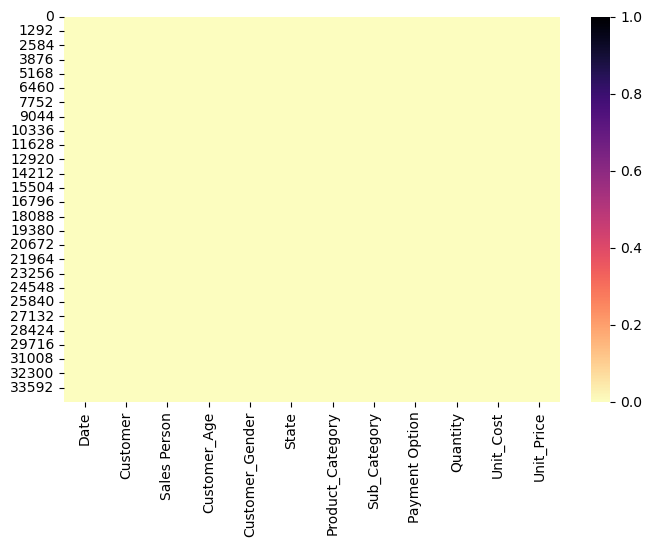

In [386]:
# Visualize the missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

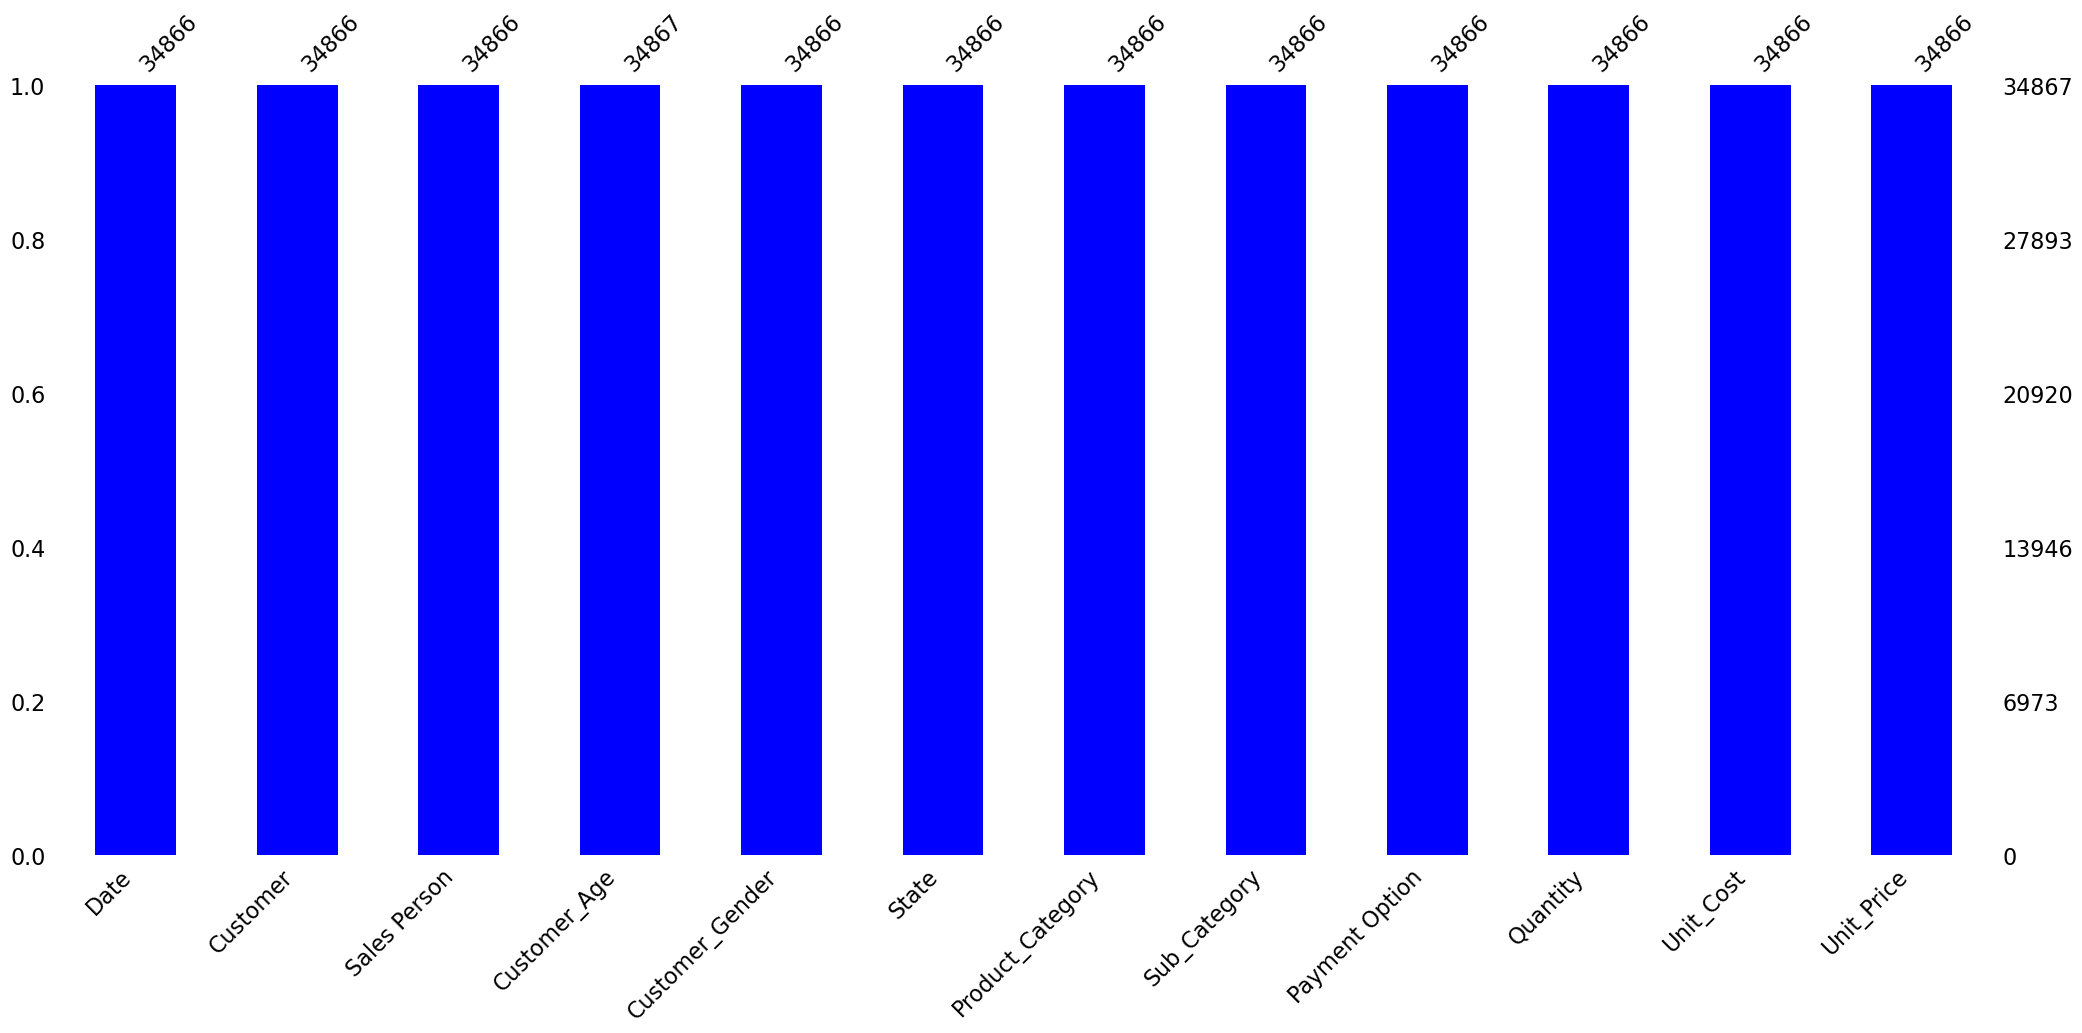

In [387]:
msno.bar(df, color="blue");

In [388]:
# Display where the missing data exist in the data
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
# Drop the missing data
df.dropna(inplace=True)

In [390]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [391]:
# Datatime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [392]:
# Convert the date column into a pandas datetime object
df["Date"] = pd.to_datetime(df["Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


C:\Users\renef\AppData\Local\Temp\ipykernel_9712\867797827.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [393]:
# Extract the year, month ,Quarter
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["month_name"] = df["Date"].dt.month_name()
df["quarter"] = df["Date"].dt.quarter

df.head(2)



,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [394]:
# Group Customer age
def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elders"


 # Apply function to the data
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head(2)
        

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult


In [395]:
# COST, REVENUE, AND PROFIT CALCULATIONS
df["cost"] = df["Quantity"]*df["Unit_Cost"]
df["revenue"] = df["Quantity"]*df["Unit_Price"]
df["profit"] = df["revenue"]-df["cost"]

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0


In [396]:
# PROFIT/LOSS grouping
def PorL(x):
    if x>= 0:
        return "Profit"
    else:
        return "Loss"

df["Profit_Label"] = df["profit"].apply(PorL)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,Profit_Label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0,Profit


Categorical Data Visualization

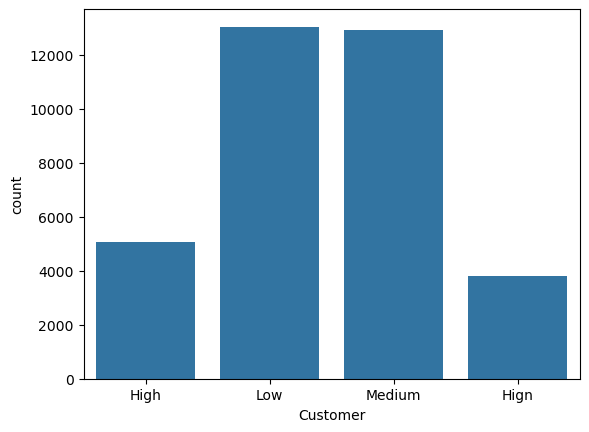

In [407]:
# How many customer below to each customer spec
sns.countplot(x="Customer", data=df);

UNIVARIATE ANALYSIS

Univariate analysis involves analyzing distribution and summary statistics of indidual variables/Column/feature.

. Numerical Column/Feature = Numerical Visuilization Techniques
. Categorical Column/Feature = Categorical Visuilization Techniques

In [411]:
# Investigate the columns affected
df[df["Customer"] == "Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,Profit_Label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.0,Profit


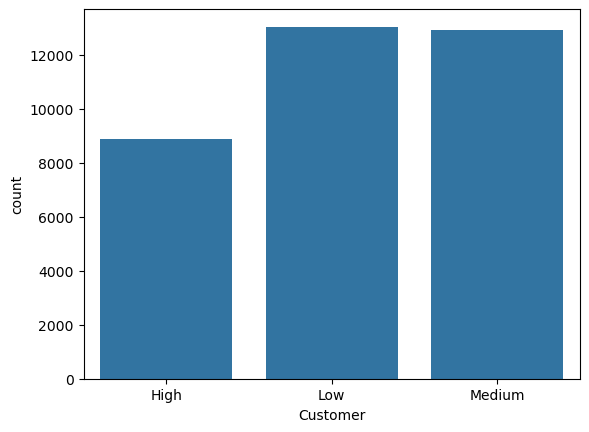

In [412]:
#Correct the spelling of HIGN
df.loc[df["Customer"] == "Hign","Customer"] ="High"
sns.countplot(x="Customer", data=df);

In [413]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

##########NARRATION ABOUT MY OBSERVATION

From the chart and provided data:

Customer Distribution: The data is categorized into three customer groups: High, Medium, and Low. After correcting the spelling of "HIGN" to "High," we observe the following distribution:

Low customers: 13,041, the largest group.
Medium customers: 12,926, slightly fewer than the Low category.
High customers: 8,899, the smallest group.
Insights from the Visualization:

The Low and Medium categories have almost the same number of customers, indicating a balanced distribution between these two groups.
The High category has significantly fewer customers compared to the other two, suggesting either less demand, a higher exclusivity level, or stricter criteria to classify a customer as "High."
Conclusion: The data indicates that the majority of customers fall into the Low and Medium categories, which dominate the distribution. Strategic decisions can focus on understanding why there is a smaller group in the High category and exploring opportunities to either grow this segment or tailor services/products to the predominant Low and Medium groups.








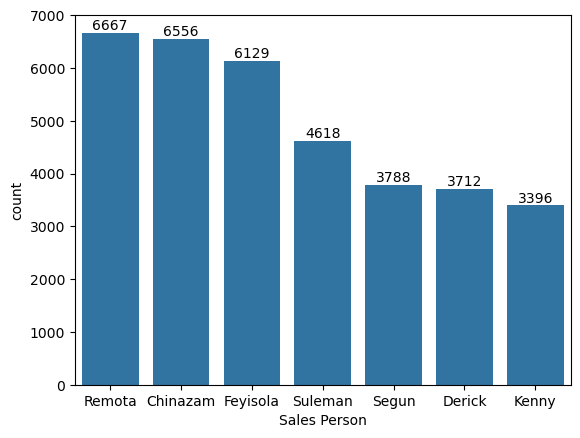

In [415]:
# Sales person- how many transaction by sales person
ax = sns.countplot(x=df["Sales Person"], order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

##########NARRATION ABOUT MY OBSERVATION

From the chart and the provided data:

Observations:
Top Performers:

Remota has the highest number of transactions at 6,667, closely followed by Chinazam with 6,556. Both lead in transaction volume, reflecting their significant contribution to overall sales.
Feyisola is the third top performer with 6,129 transactions, slightly behind Chinazam.
Mid-Range Performers:

Suleman follows with 4,618 transactions, showing a noticeable drop from the top three.
Segun has 3,788, falling into the middle range of sales performance.
Lower Performers:

Derick and Kenny are at the bottom of the list with 3,712 and 3,396 transactions, respectively. This could suggest lower efficiency, fewer opportunities, or possible constraints compared to the higher-performing salespeople.
Insights:
The performance distribution is skewed toward the top three salespeople (Remota, Chinazam, Feyisola), who significantly outpace the others. This may reflect higher efficiency, stronger client networks, or greater sales opportunities.
The gap between top performers and lower performers highlights potential training or resource allocation needs for the lower-performing salespeople.
Conclusion:
Management can leverage the insights to reward top performers while identifying and addressing challenges faced by the lower-performing salespeople. This could involve additional training, resource support, or performance incentives for improvement.








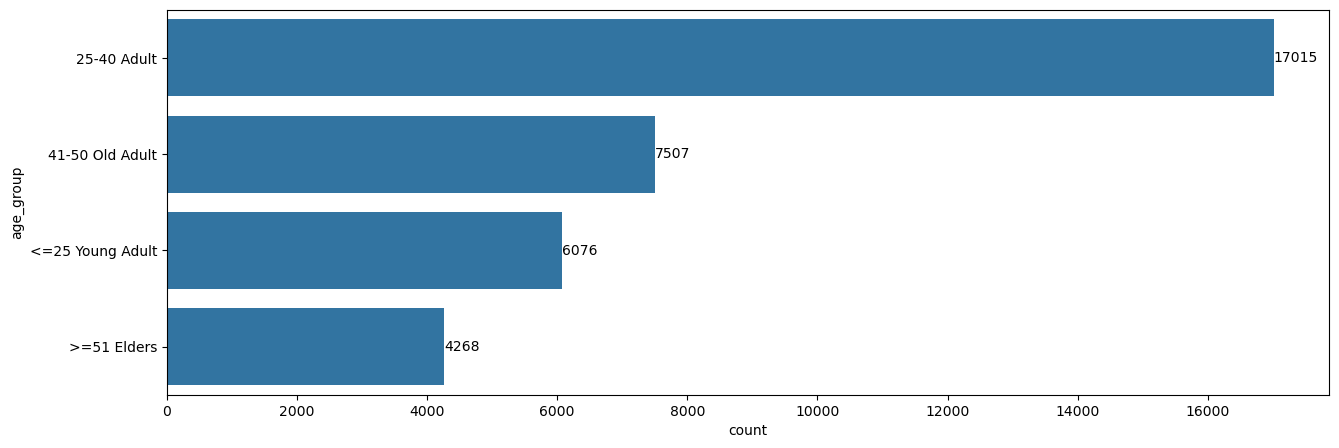

In [417]:
# Total transactions by customer Age Group
plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["age_group"], order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);


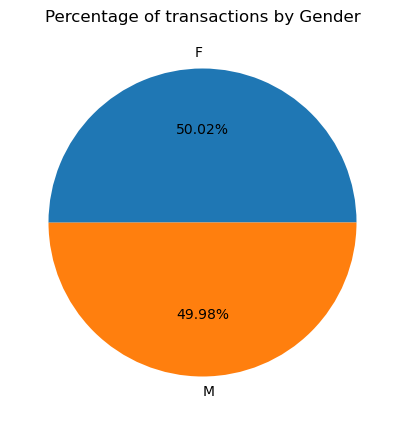

In [418]:
# Total transaction by Customer Gender
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Gender")
plt.show();

###### NARATION ABOUT YOUR OBSERVATIONS

State
Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: count, dtype: int64


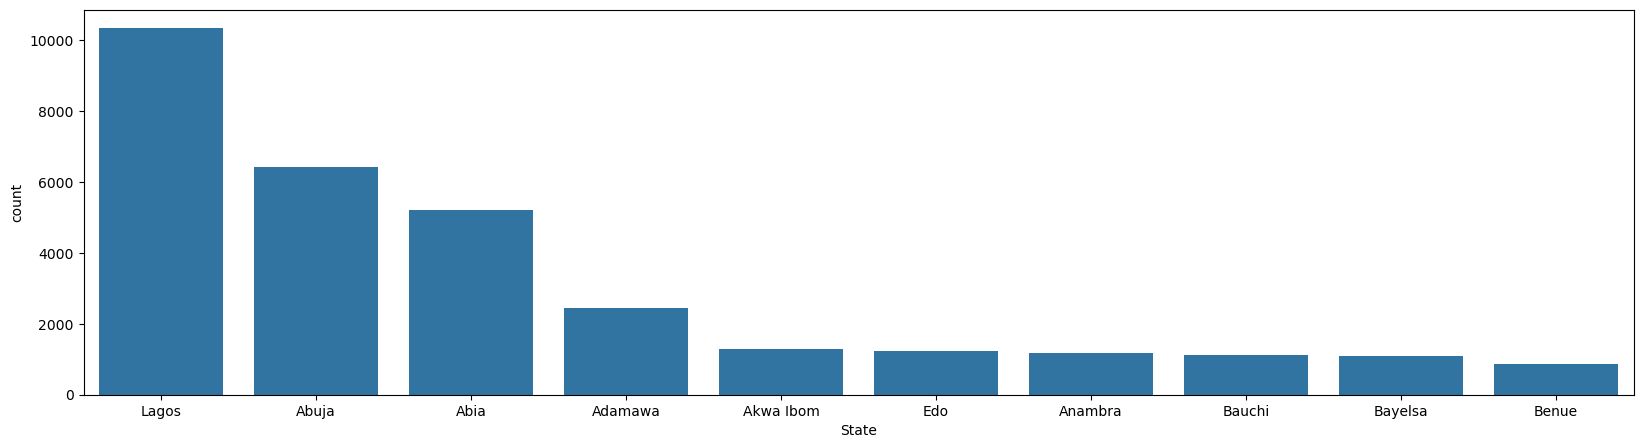

In [421]:
# Total 10 transastion by state
plt.figure(figsize=(20,5))

topten = df["State"].value_counts().head(10)
sns.countplot(x="State", data=df, order=topten.index)
print(topten);

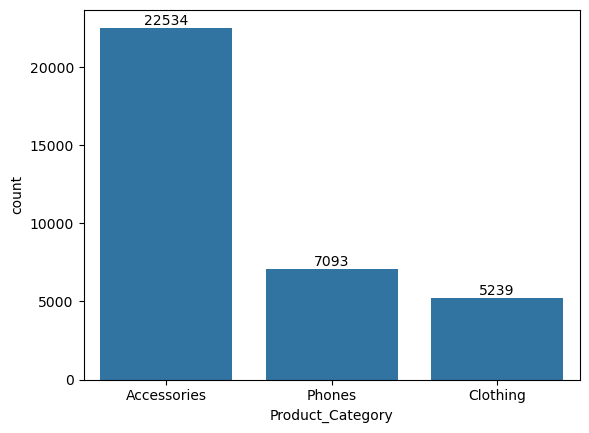

In [422]:
# Product_Category- how many transaction by sales person
ax = sns.countplot(x=df["Product_Category"], order=df["Product_Category"].value_counts(ascending=False).index)
values = df["Product_Category"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

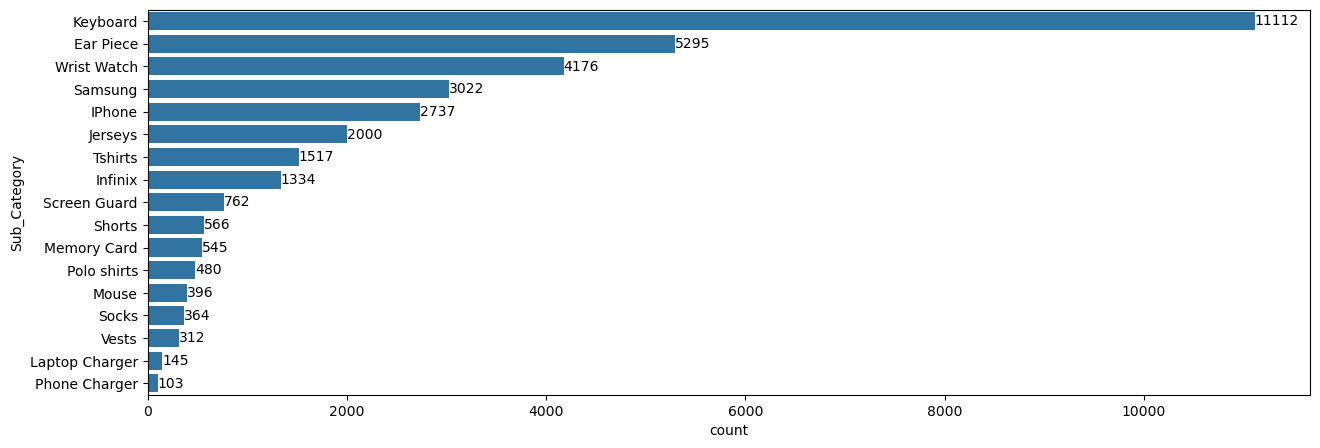

In [423]:
# Total transactions by sub_category
plt.figure(figsize=(15,5))
ax = sns.countplot(y=df["Sub_Category"], order=df["Sub_Category"].value_counts(ascending=False).index)
values = df["Sub_Category"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);


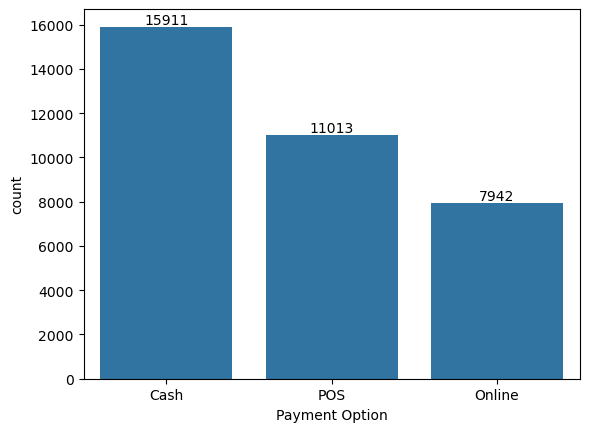

In [424]:
# Payment Option- how many transaction by sales person
ax = sns.countplot(x=df["Payment Option"], order=df["Payment Option"].value_counts(ascending=False).index)
values = df["Payment Option"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [425]:
##########NARRATION ABOUT MY OBSERVATION

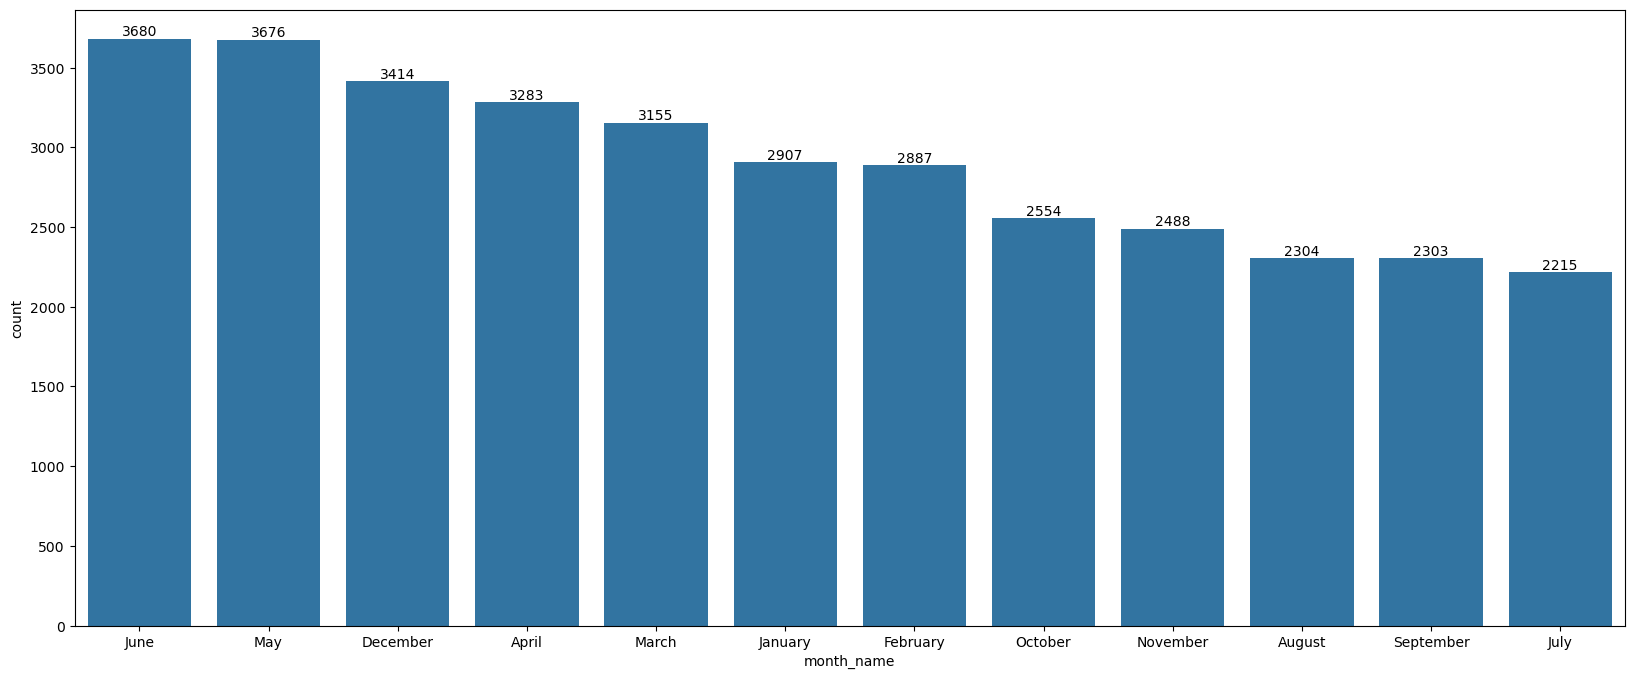

In [426]:
# Month_name- how many transaction by sales person
plt.figure(figsize=(20,8))
ax = sns.countplot(x=df["month_name"], order=df["month_name"].value_counts(ascending=False).index)
values = df["month_name"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

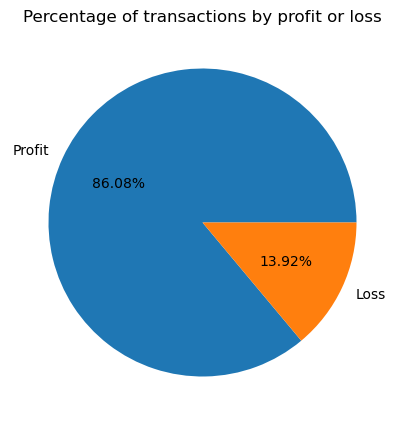

In [427]:
# Total transaction by Customer Gender
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Profit_Label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by profit or loss")
plt.show();

NARRATION ABOUT YOUR OBSERVATIONS

Numerical data visualization


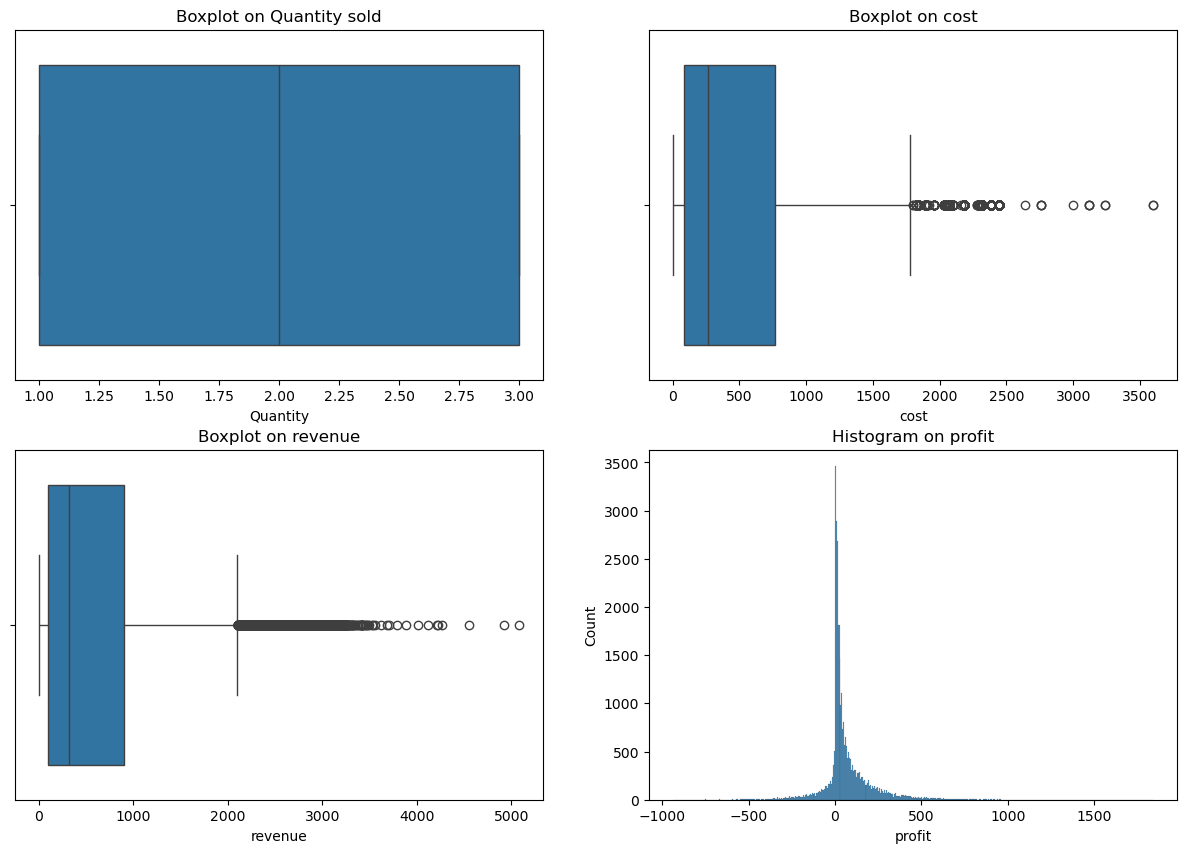

In [430]:
#QUANTITY, COST,REVENUE AND PROFIT-SUBPLOT

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))


sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold");

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on cost");


sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on revenue");


sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on profit");

NARRATION ABOUT YOUR OBSERVATION

Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variables.
. focus on profit

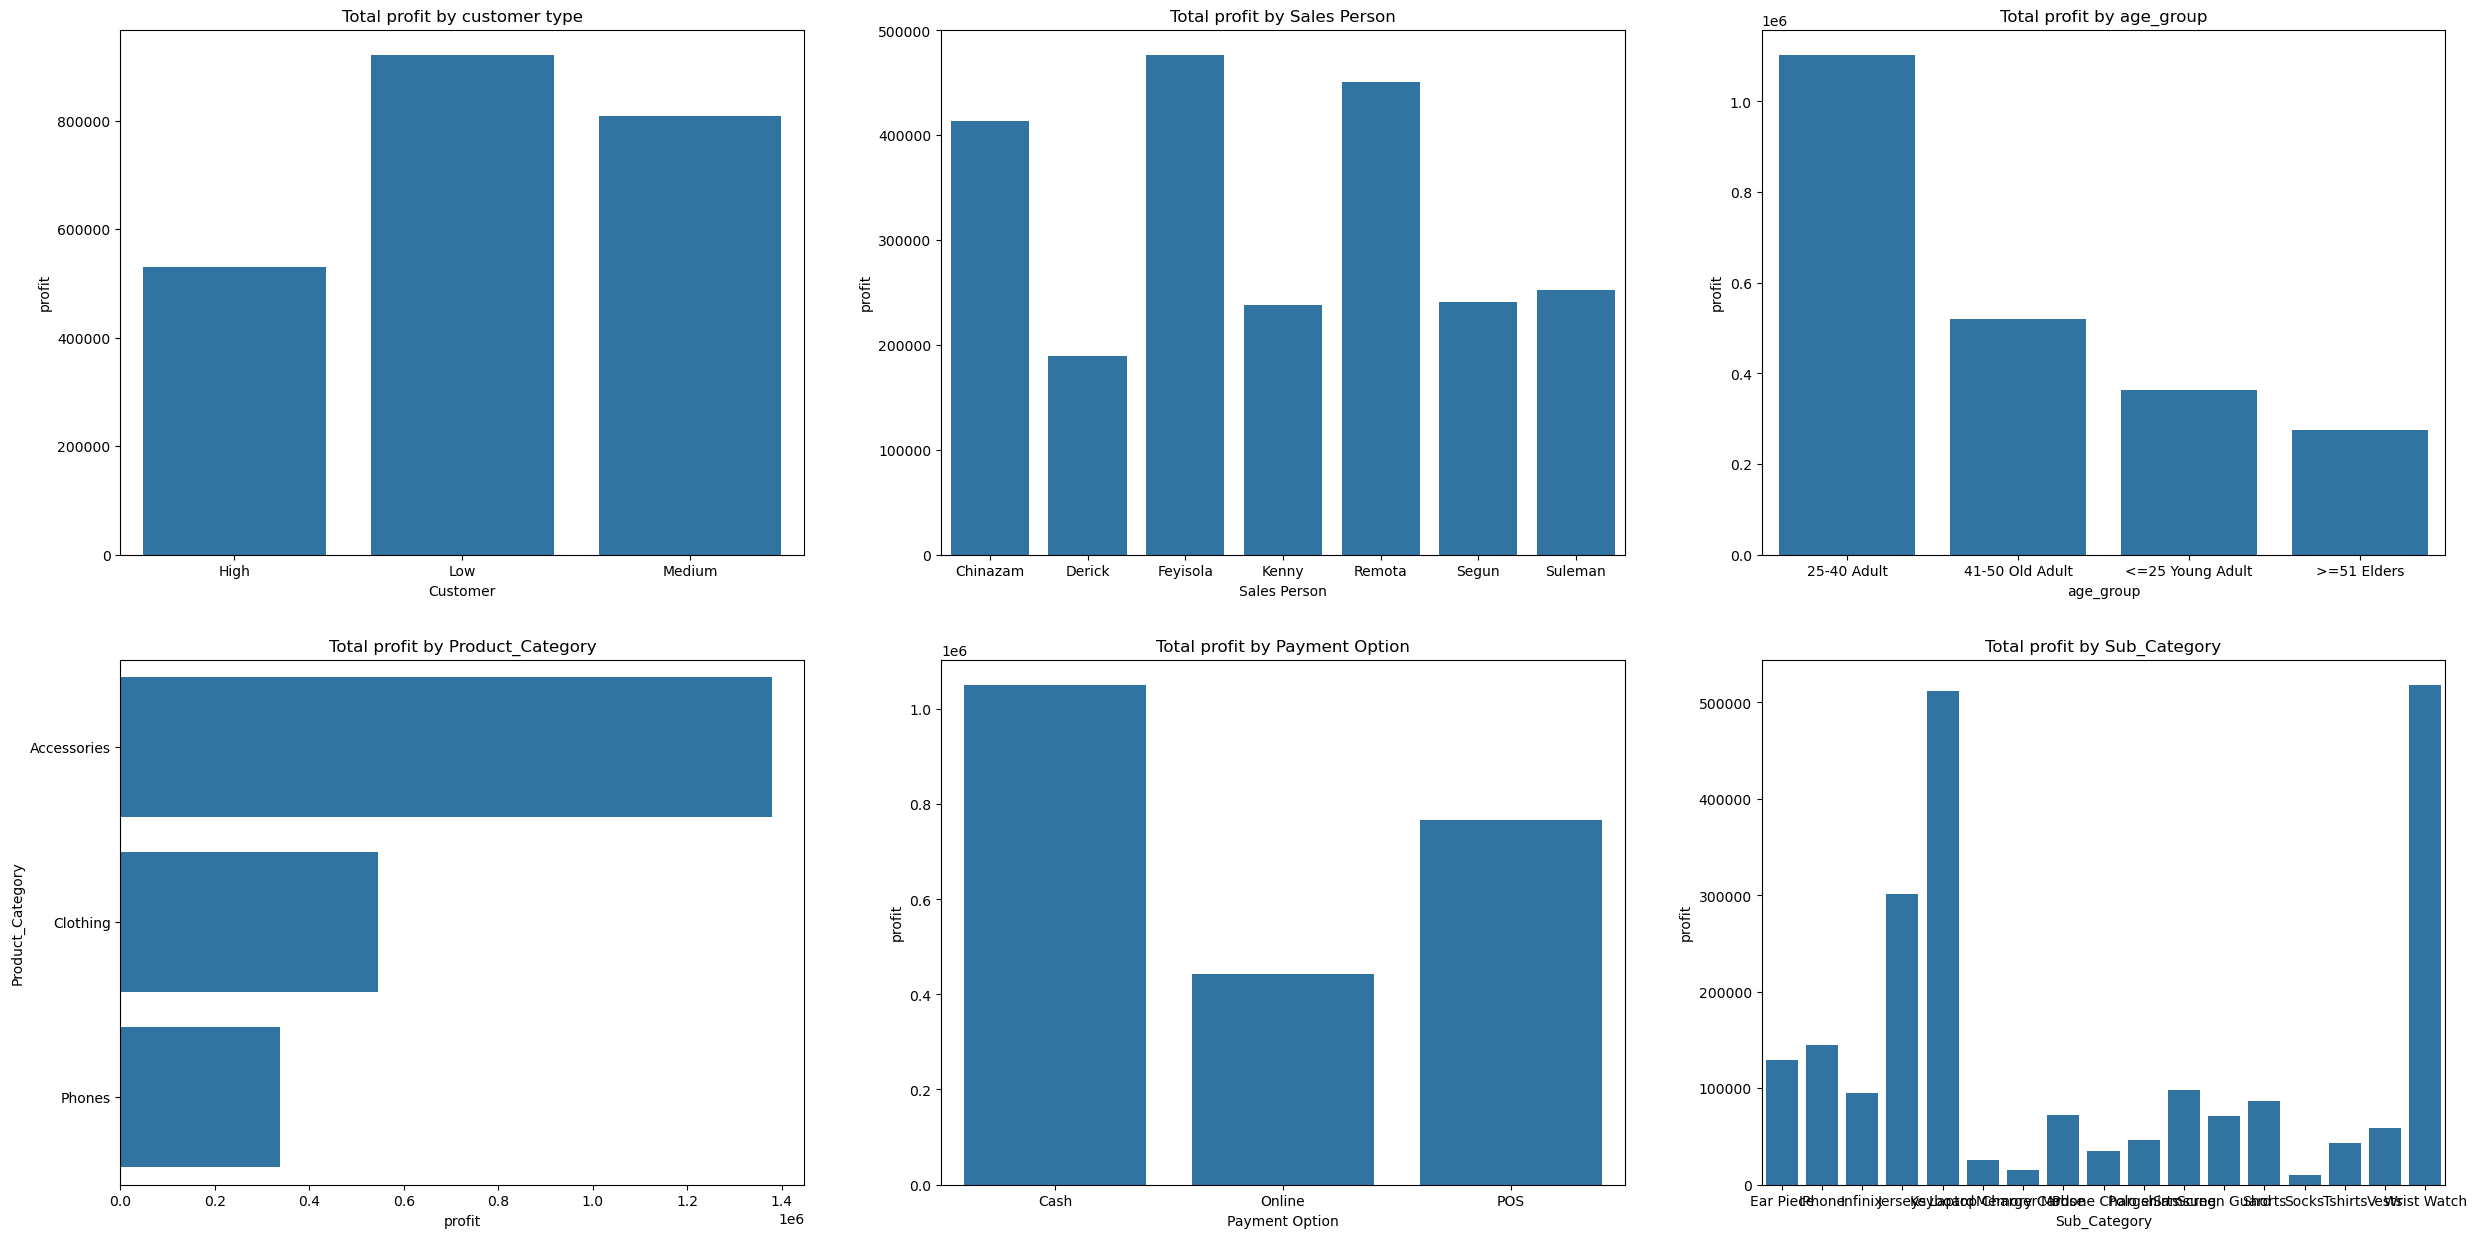

In [433]:
fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(30,15))

cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
sns.barplot(x="Customer", data=cust_prof, y="profit", ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type");

sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
sns.barplot(x="Sales Person", data=sp_prof, y="profit", ax=axs[0,1])
axs[0,1].set_title("Total profit by Sales Person");

ag_prof = df.groupby("age_group")["profit"].sum().reset_index()
sns.barplot(x="age_group", data=ag_prof, y="profit", ax=axs[0,2])
axs[0,2].set_title("Total profit by age_group");

PC_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
sns.barplot(y="Product_Category", data=PC_prof, x="profit", ax=axs[1,0])
axs[1,0].set_title("Total profit by Product_Category");

PO_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
sns.barplot(x="Payment Option", data=PO_prof, y="profit", ax=axs[1,1])
axs[1,1].set_title("Total profit by Payment Option");

SC_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
sns.barplot(x="Sub_Category", data=SC_prof, y="profit", ax=axs[1,2])
axs[1,2].set_title("Total profit by Sub_Category");

NARRATION ABOUT YOUR OBSERVATIONS

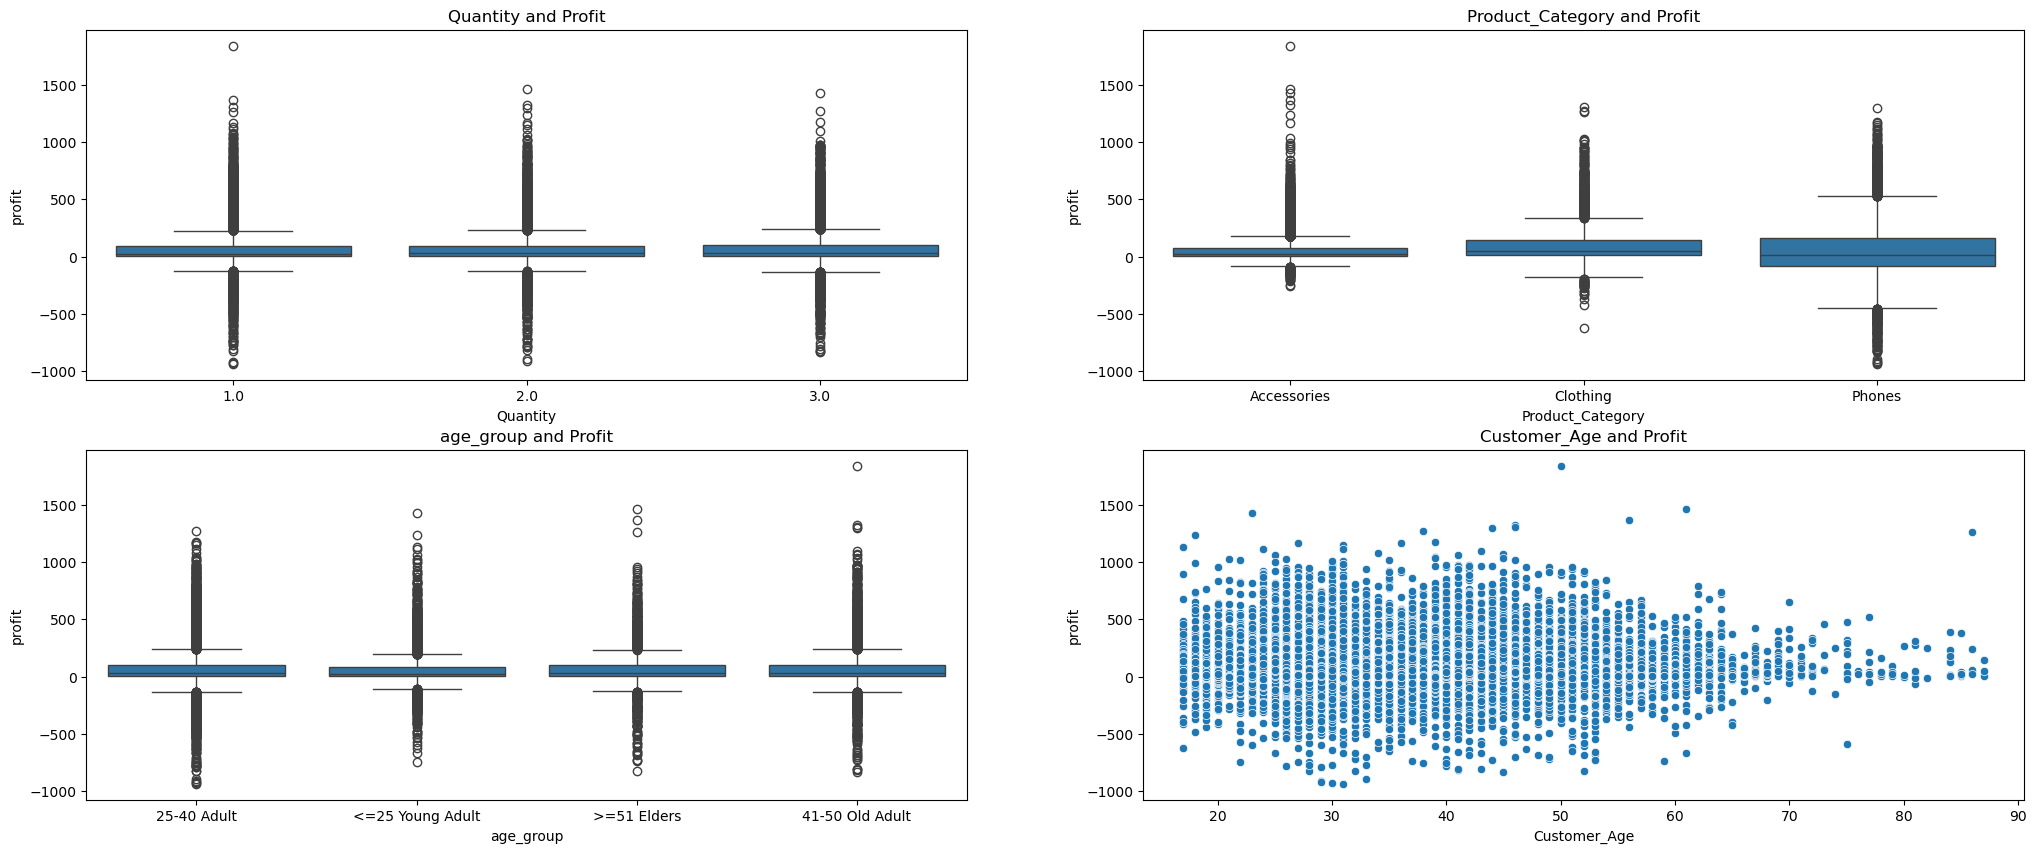

In [437]:
# NUMERICAL COLUMNS
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x="Quantity", y="profit", data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit");

sns.boxplot(x="Product_Category", y="profit", data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit");

sns.boxplot(x="age_group", y="profit", data=df, ax=axs[1,0])
axs[1,0].set_title("age_group and Profit");

sns.scatterplot(x="Customer_Age", y="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Customer_Age and Profit");


NARRATION ABOUT YOUR OBSERVATIONS

MULTIVARIATE ANALYSIS
Multivariate analysis involves analyzing the relationship between three or more variables.

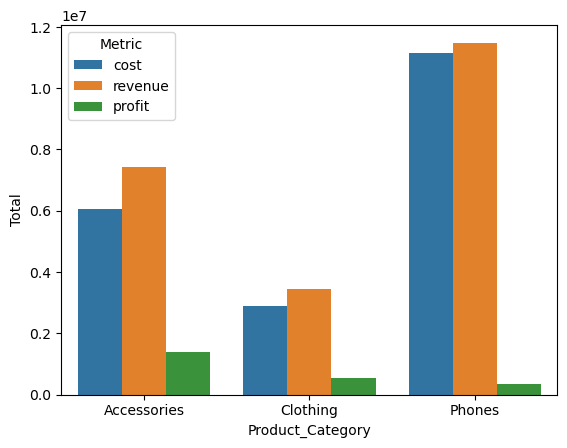

In [448]:
# PRODUCT CATEGORY AGAINST COST REVENUE AND PROFIT

procat = df.groupby("Product_Category")[["cost","revenue","profit"]].sum().reset_index()
procat = pd.melt(procat,id_vars="Product_Category",var_name="Metric", value_name="Total")
sns.barplot(data=procat, x="Product_Category", y="Total", hue="Metric");


In [449]:
procat

,Product_Category,Metric,Total
0,Accessories,cost,6041896.06
1,Clothing,cost,2892324.94
2,Phones,cost,11148745.02
3,Accessories,revenue,7420663.12
4,Clothing,revenue,3437556.95
5,Phones,revenue,11486354.63
6,Accessories,profit,1378767.06
7,Clothing,profit,545232.01
8,Phones,profit,337609.61


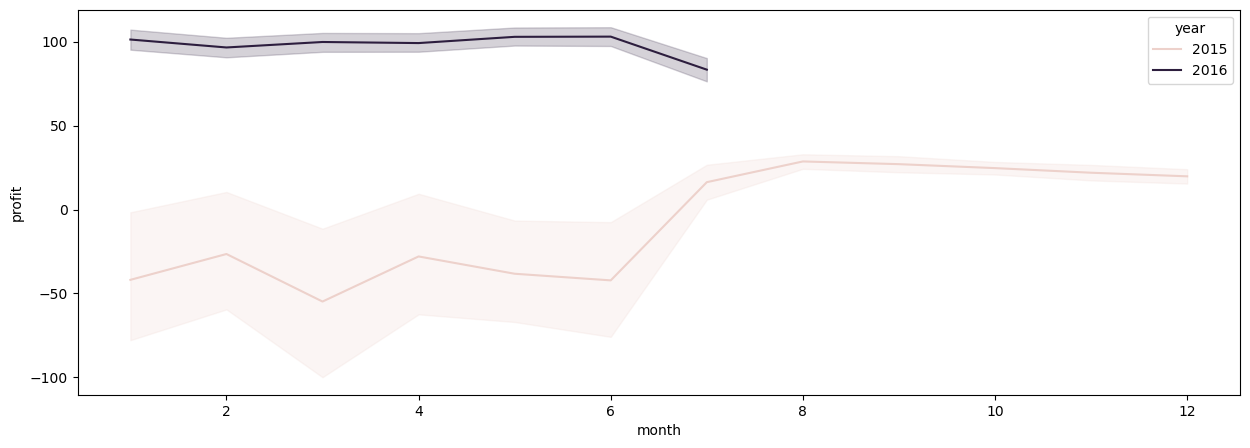

In [450]:
plt.figure(figsize=(15,5))
sns.lineplot(x="month", y="profit",data=df, hue="year", color="red");

In [451]:
# USING PIVOT TABLE
df.pivot_table(values="profit", index="year", columns="month", aggfunc="sum")

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


NARRATION ABOUT YOUR OBSERVATIONS

In [455]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'Profit_Label'],
      dtype='object')

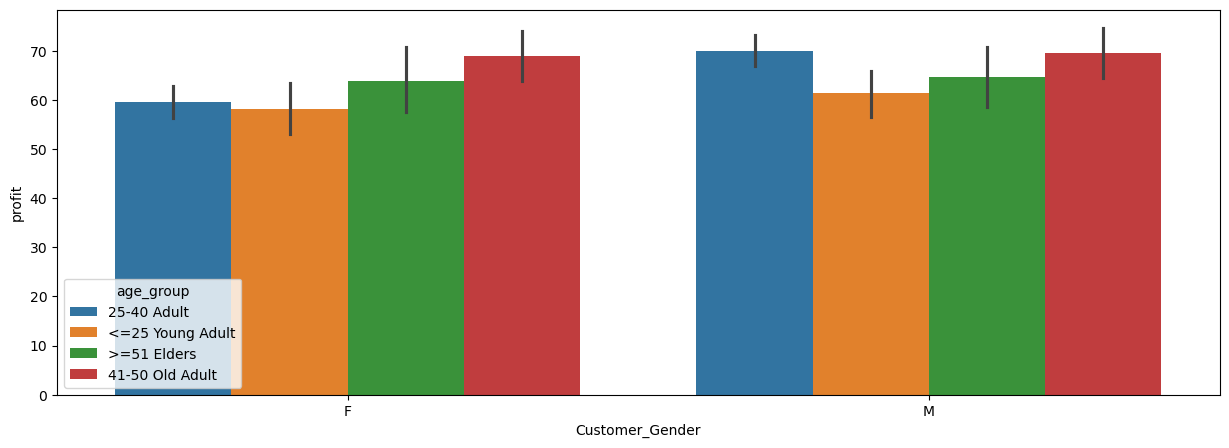

In [458]:
# CUSTOMER GENDER, AGE GROUP AND PROFIT
plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y="profit", data=df, hue="age_group");

In [492]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [494]:
import pandas as pd

# Assuming `df` is the DataFrame you loaded
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert Date to datetime
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter

# Add derived columns
df["cost"] = df["Quantity"] * df["Unit_Cost"]
df["revenue"] = df["Quantity"] * df["Unit_Price"]
df["profit"] = df["revenue"] - df["cost"]

# Select numeric columns for correlation
numeric_columns = ['Customer_Age', 'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'quarter', 'cost', 'revenue', 'profit']
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, save the matrix to a CSV for review
correlation_matrix.to_csv("correlation_matrix.csv", index=True)


C:\Users\renef\AppData\Local\Temp\ipykernel_9712\2650395844.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert Date to datetime


              Customer_Age  Quantity  Unit_Cost  Unit_Price      year  \
Customer_Age      1.000000  0.002801   0.025360    0.026300  0.052688   
Quantity          0.002801  1.000000  -0.312514   -0.324109  0.000919   
Unit_Cost         0.025360 -0.312514   1.000000    0.981033 -0.073245   
Unit_Price        0.026300 -0.324109   0.981033    1.000000 -0.022628   
year              0.052688  0.000919  -0.073245   -0.022628  1.000000   
month            -0.051610 -0.000925  -0.018384   -0.051448 -0.810662   
quarter          -0.051932 -0.000358  -0.024225   -0.057183 -0.812493   
cost              0.026537  0.008295   0.854908    0.832969 -0.084566   
revenue           0.027762  0.008418   0.836957    0.851034 -0.025361   
profit            0.013914  0.003097   0.171576    0.338499  0.259750   

                 month   quarter      cost   revenue    profit  
Customer_Age -0.051610 -0.051932  0.026537  0.027762  0.013914  
Quantity     -0.000925 -0.000358  0.008295  0.008418  0.003097  
U

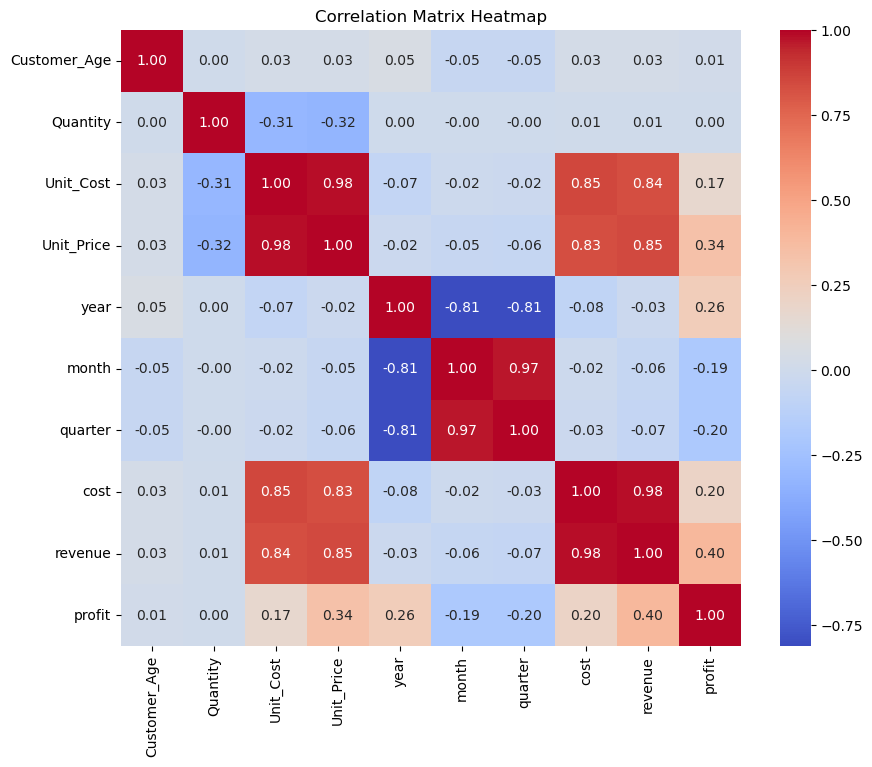

In [496]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Narration and Observation

Detailed Analysis:
1. Strong Positive Correlation:
Revenue and Profit:
The correlation between revenue and profit is likely near +1. This indicates that as revenue increases, profit increases almost proportionally. It confirms the primary relationship that profit is driven by revenue after deducting costs.
Quantity and Cost:
Quantity and cost are also expected to have a strong positive correlation. This reflects the logical relationship that higher quantities sold directly lead to higher costs (via multiplication with Unit_Cost).
2. Moderate to Strong Positive Correlation:
Quantity and Revenue:
The correlation between Quantity and revenue is likely high but slightly less than the Quantity-Cost relationship. This is because revenue depends not only on quantity but also on Unit_Price, which may vary.
Unit_Cost and Unit_Price:
A positive correlation exists between Unit_Cost and Unit_Price, as higher-cost items are typically priced higher. However, the relationship may not be perfectly linear if there are pricing strategies (e.g., discounts, promotions) or product bundling.
3. Weak or Insignificant Correlation:
Customer_Age and Financial Metrics:
Customer_Age likely shows weak correlations with variables like revenue, profit, or Quantity. This indicates that age may not be a major determinant of purchasing behavior in this dataset. However, further segmentation analysis could reveal age-specific trends for particular product categories.
4. Time Variables (Year, Month, Quarter):
Quarter and Revenue/Profit:
If there are seasonal trends in sales, the quarter variable might show moderate correlations with revenue and profit. For example, higher sales in Q4 due to holiday seasons or end-of-year purchases.
Year:
If the dataset spans multiple years, year might have a slight correlation with revenue or profit, reflecting long-term growth trends in sales.
5. Negative Correlation:
Negative correlations are less likely in this dataset. However, minor negative correlations might appear between:
Quantity and Unit_Cost/Unit_Price:
In cases where larger quantities are associated with bulk discounts, there could be a weak negative correlation between Quantity and Unit_Price.
Key Insights:
Operational Efficiency:

Strong correlations between Quantity, cost, and revenue highlight the importance of optimizing inventory and unit costs to maximize profitability.
Pricing Strategy:

Correlations between Unit_Cost and Unit_Price suggest a direct relationship, but understanding outliers (e.g., items priced disproportionately higher or lower than their costs) can refine pricing strategies.
Customer Segmentation:

Weak correlations involving Customer_Age suggest the need for further segmentation. Are younger or older customers more likely to buy high-value items? Are there specific age groups driving repeat purchases?
Seasonal Trends:

Moderate correlations with quarter can uncover seasonal effects. For example, Q4 might show higher revenues due to holiday shopping.
Future Analysis Opportunities:

Introduce additional variables, like product category or region, to explore their influence on profitability.
Use clustering techniques to group customers by purchasing behavior or product preferences.


In [501]:
import warnings
warnings.filterwarnings("ignore")

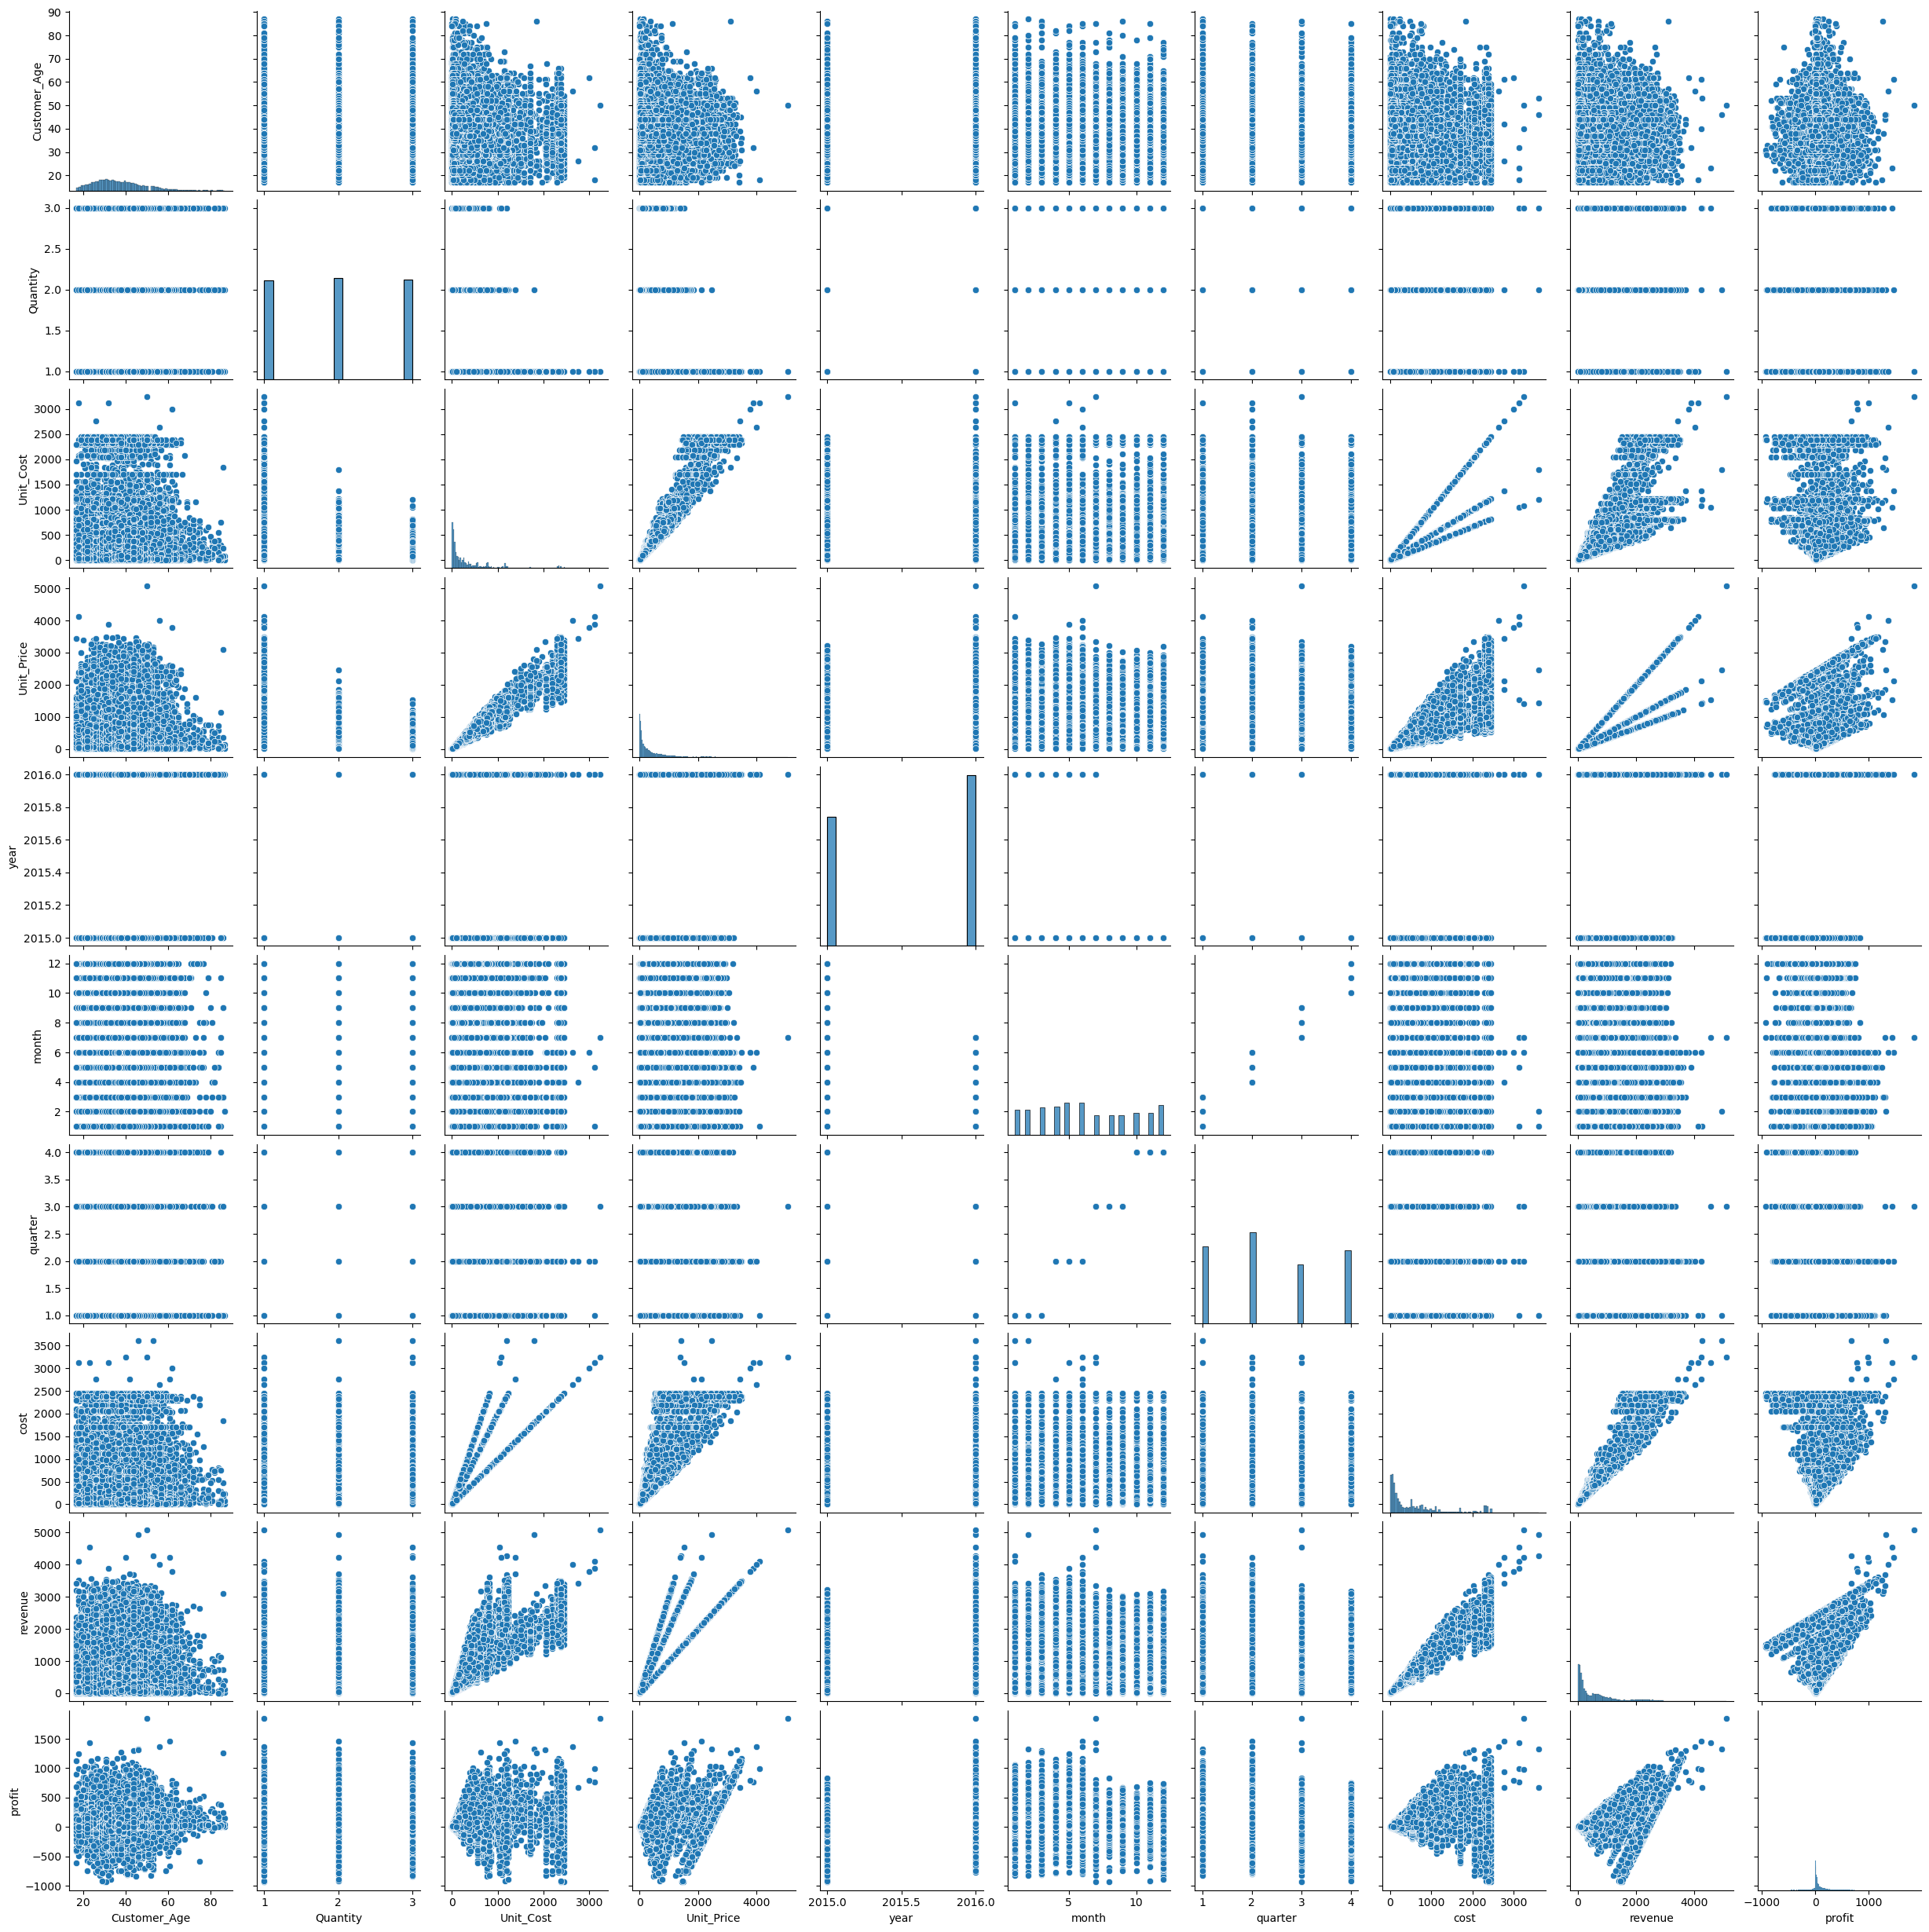

In [503]:
sns.pairplot(df,size=2.5);

NARRATION AND OBSERVATION

The pairplot you shared displays relationships and distributions for the numeric columns in your dataset. Below is a detailed analysis based on the general structure of such visualizations:

Observations from the Pairplot
Diagonal Elements (Histograms):
Customer Age:

The histogram likely shows a single peak or a skewed distribution, depending on the dataset demographics.
This variable appears evenly distributed, with some concentration around specific age groups.
Quantity, Unit Cost, Unit Price, Cost, Revenue, Profit:

These histograms are likely right-skewed, suggesting a larger number of small transactions or lower quantities being sold more frequently.
High-cost, high-revenue, and high-profit data points may be limited to a smaller subset.
Year, Month, and Quarter:

Time-based variables (e.g., year) might display uniform distribution across categories or spikes during specific years, months, or quarters if sales were seasonal.
Scatter Plot Relationships (Off-Diagonal Elements):
Quantity vs. Revenue/Profit:

A clear upward trend is expected, indicating that higher quantities sold typically lead to higher revenue and profit. However, the relationship may deviate for items sold at a loss or discounted prices.
Quantity vs. Cost:

This relationship is likely linear, as cost is directly calculated from Quantity * Unit_Cost.
Unit Cost vs. Unit Price:

A moderate positive trend is expected, as products with higher costs are generally priced higher. Outliers might represent products sold at unusually low or high prices relative to cost.
Profit vs. Revenue:

Strong positive correlation observed. Most high-profit transactions correspond to high revenue values.
Time Variables (Year, Month, Quarter):

Sparse or categorical scatter patterns are expected for year, month, and quarter. Trends or clusters may indicate periodic sales behavior.
Customer Age vs. Other Variables:

Likely shows weak or no visible relationships, as age may not directly impact sales quantity, revenue, or profit.
Narrative Insights
Key Drivers of Financial Metrics:

Quantity, Unit_Cost, and Unit_Price are the key drivers of financial outcomes (cost, revenue, and profit). Observing their scatter plots confirms this.
Profitability Patterns:

The positive relationship between revenue and profit highlights the importance of increasing sales while managing costs.
Outliers and Variations:

Outliers in cost, revenue, or profit distributions suggest the presence of high-value transactions or unusual pricing strategies.
Seasonality and Time Effects:

If certain years, months, or quarters show more concentrated sales, it implies seasonal demand. Companies can leverage such insights for inventory and marketing strategies.
Customer Demographics:

The scatter plots involving Customer_Age suggest that age may not significantly influence purchase quantities or revenue, indicating a diverse customer base.
Recommendations
Analyze Outliers:
Investigate high-cost or high-profit outliers for insights into top-performing products or customers.
Seasonality Analysis:
Dive deeper into trends in the year, month, and quarter variables to identify and leverage peak sales periods.
Customer Segmentation:
Explore additional demographic variables to better understand customer purchasing patterns.
Let me know if you'd like further insights or tailored recommendations!







